# Data Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Fall24/IS777/IS777ProjectWork/household_power_consumption.txt',delimiter=';')

<ipython-input-2-ad28a49654a6>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Fall24/IS777/IS777ProjectWork/household_power_consumption.txt',delimiter=';')


In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
data.shape

(2075259, 9)

In [ ]:
import pandas as pd

columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                      'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
                      'Sub_metering_3']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

print(data.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [ ]:
data.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [ ]:
data[data.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,28/9/2010,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,28/9/2010,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,28/9/2010,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.ffill(inplace=True)

In [ ]:
data['TIME'] = data['Date']+";"+data['Time']
data['TIME'] = pd.to_datetime(data['TIME'],format="%d/%m/%Y;%H:%M:%S")

In [ ]:
data.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
TIME,0


In [ ]:
data['Date']=pd.to_datetime(data['Date'])

<ipython-input-9-54a1eaf80efb>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data['Date'])


In [ ]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['hour']=data['TIME'].dt.hour
data['day']=data['TIME'].dt.day

In [ ]:
data = data[data['Year']!=2006] # Removing because less values for 2006

# Analysis

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,TIME,Year,Month,hour,day
21996,2007-01-01,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,2007,1,0,1
21997,2007-01-01,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,2007,1,0,1
21998,2007-01-01,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,2007,1,0,1
21999,2007-01-01,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,2007,1,0,1
22000,2007-01-01,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,2007,1,0,1


In [ ]:
# Considering day's lowest and highest value to get the power consumption for each day
hourly_power = data.groupby(['Year','Month','hour'])['Global_active_power'].agg(lambda x: x.max() - x.min())

In [ ]:
a = hourly_power.to_frame()
a.reset_index(inplace=True)
a.head()

,Year,Month,hour,Global_active_power
0,2007,1,0,7.430
1,2007,1,1,4.340
2,2007,1,2,6.042
3,2007,1,3,2.590
4,2007,1,4,2.392


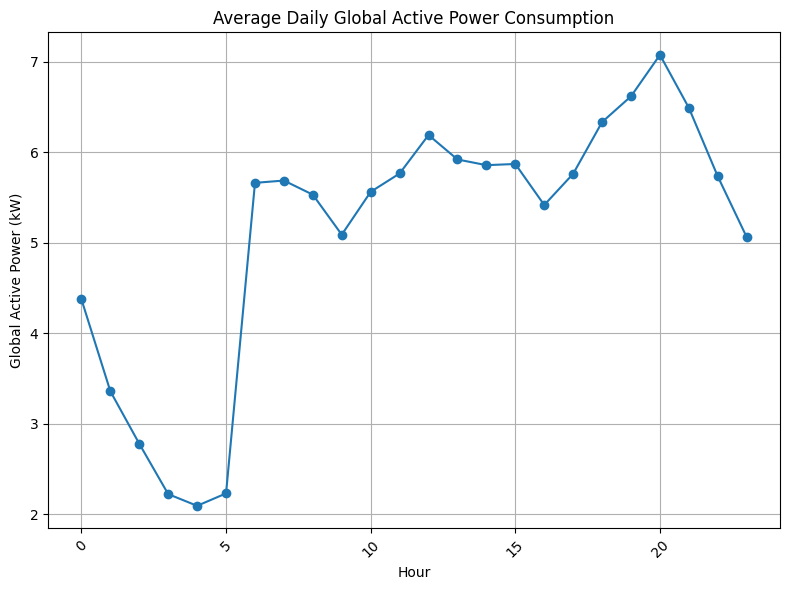

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

daily_avg_power = a.groupby('hour')['Global_active_power'].mean()
plt.figure(figsize=(8, 6))
plt.plot(daily_avg_power.index, daily_avg_power.values, marker='o', linestyle='-')
plt.title('Average Daily Global Active Power Consumption')
plt.xlabel('Hour')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
daily_power = data.groupby(['Year','Month','day'])['Global_active_power'].agg(lambda x: x.max() - x.min())
a = daily_power.to_frame()
a.reset_index(inplace=True)
a.head()

,Year,Month,day,Global_active_power
0,2007,1,1,3.354
1,2007,1,2,3.330
2,2007,1,3,4.960
3,2007,1,4,5.716
4,2007,1,5,5.508


In [ ]:
b = a.groupby(['Year','Month'])['Global_active_power'].sum()
c = b.to_frame()
c.reset_index(inplace=True)

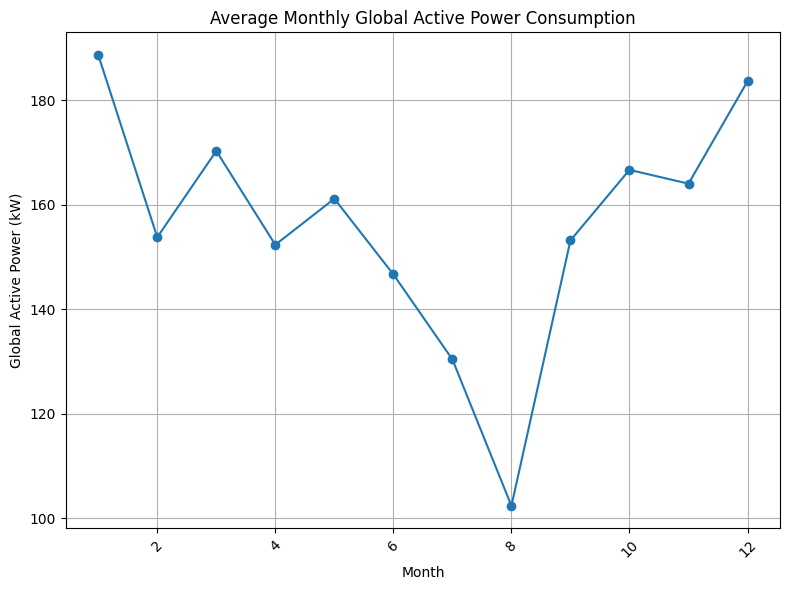

In [ ]:
monthly_avg_power = c.groupby('Month')['Global_active_power'].mean()
plt.figure(figsize=(8, 6))
plt.plot(monthly_avg_power.index, monthly_avg_power.values, marker='o', linestyle='-')
plt.title('Average Monthly Global Active Power Consumption')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
c.head()

,Year,Month,Global_active_power
0,2007,1,197.122
1,2007,2,159.588
2,2007,3,182.086
3,2007,4,139.508
4,2007,5,169.504


In [ ]:
yearly_power = c.groupby(['Year'])['Global_active_power'].sum()
a = yearly_power.to_frame()
a.reset_index(inplace=True)
a.head()

,Year,Global_active_power
0,2007,2076.514
1,2008,1898.034
2,2009,1862.796
3,2010,1471.040


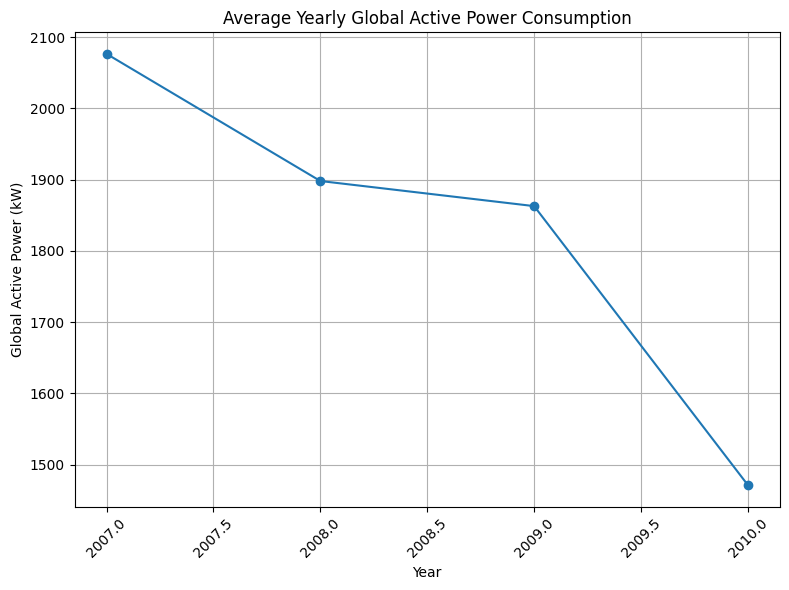

In [ ]:
yearly_avg_power = a.groupby('Year')['Global_active_power'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_avg_power.index, yearly_avg_power.values, marker='o', linestyle='-')
plt.title('Average Yearly Global Active Power Consumption')
plt.xlabel('Year')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Prep for Sarimax

In [ ]:
power = data.groupby(['Date'])['Global_active_power'].agg(lambda x: x.max() - x.min())

In [ ]:
power.head()

,Global_active_power
Date,
2007-01-01,3.354
2007-01-02,3.330
2007-01-03,4.960
2007-01-04,5.716
2007-01-05,5.508


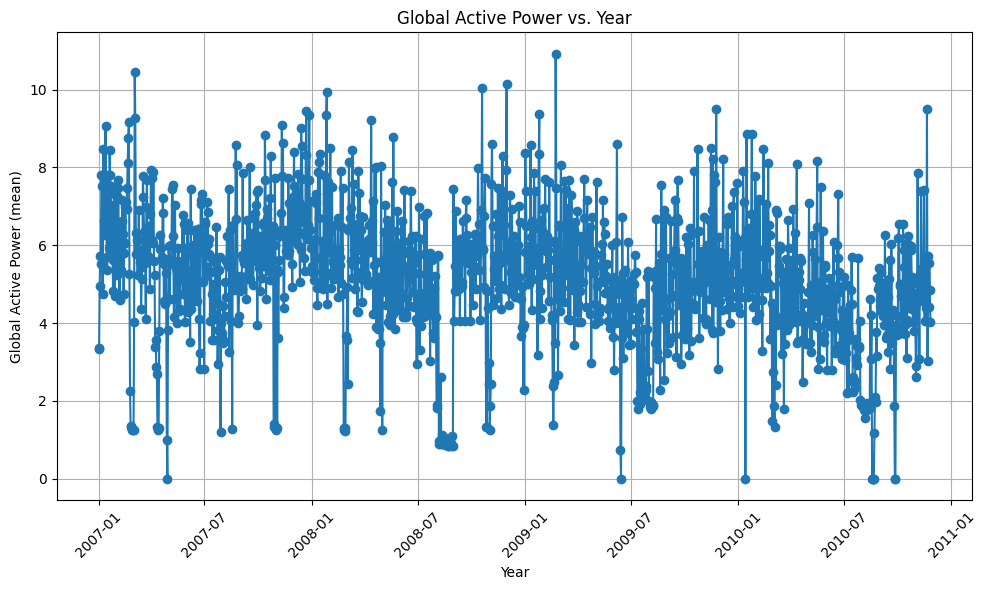

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(power.index, power.values, marker='o', linestyle='-')
plt.title('Global Active Power vs. Year')
plt.xlabel('Year')
plt.ylabel('Global Active Power (mean)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
no_outliers = power[(np.abs(power - power.mean()) <= (3 * power.std()))] #no outliers

In [ ]:
no = no_outliers.to_frame()

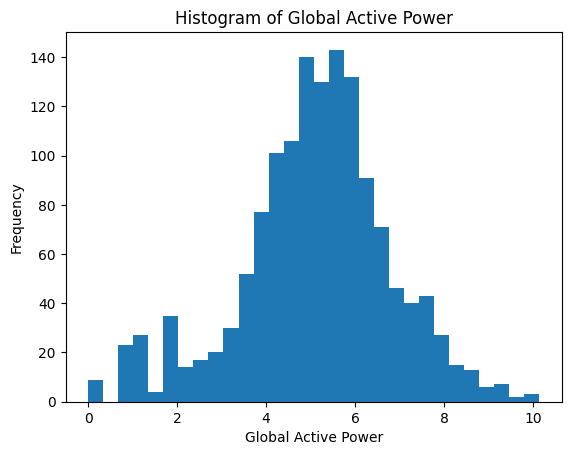

In [ ]:
plt.hist(no['Global_active_power'], bins=30)
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.title('Histogram of Global Active Power')
plt.show()

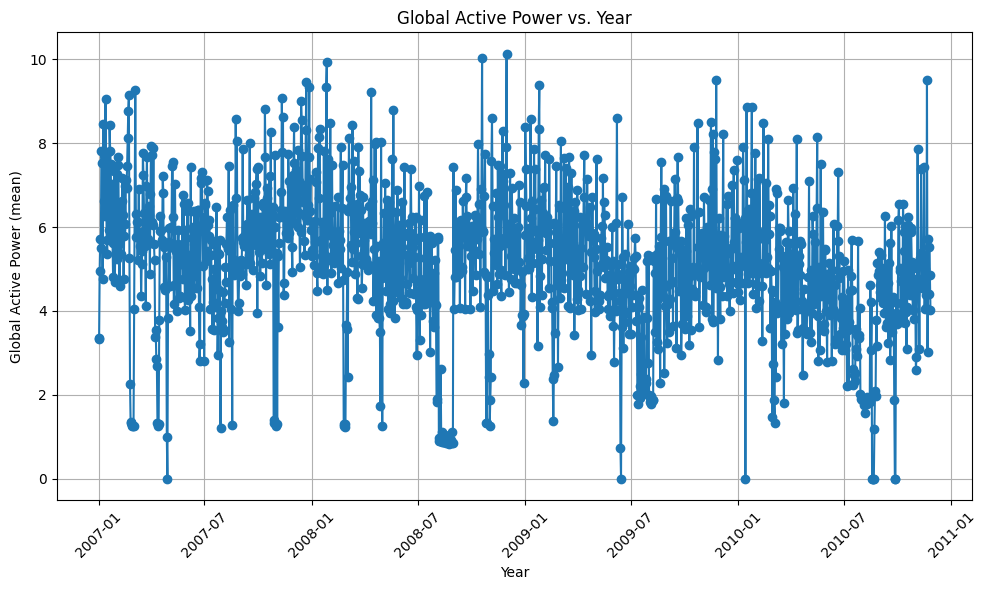

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(no.index, no.values, marker='o', linestyle='-')
plt.title('Global Active Power vs. Year')
plt.xlabel('Year')
plt.ylabel('Global Active Power (mean)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
no.head()

,Global_active_power
Date,
2007-01-01,3.354
2007-01-02,3.330
2007-01-03,4.960
2007-01-04,5.716
2007-01-05,5.508


In [ ]:
no.reset_index(inplace=True)
no['Month'] = no['Date'].dt.month
no['Year'] = no['Date'].dt.year

In [ ]:
Monthly_power = no.groupby(['Year','Month'])['Global_active_power'].sum()
Monthly_power = Monthly_power.reset_index()


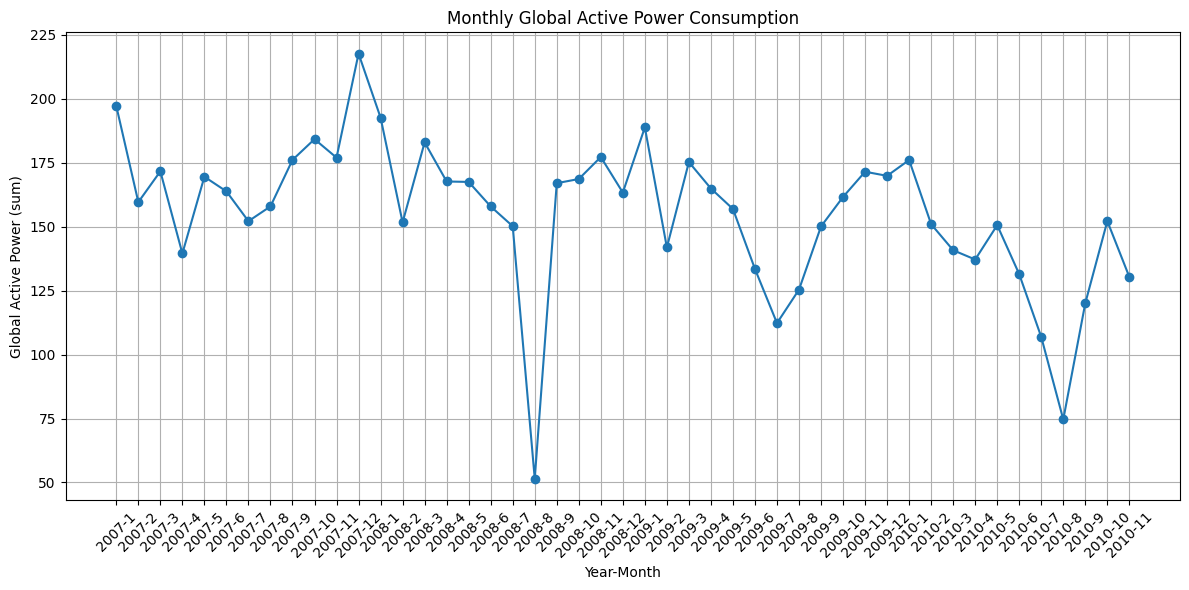

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(Monthly_power.index, Monthly_power['Global_active_power'], marker='o', linestyle='-')
plt.title('Monthly Global Active Power Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Global Active Power (sum)')
plt.grid(True)
plt.xticks(Monthly_power.index, Monthly_power['Year'].astype(str) + '-' + Monthly_power['Month'].astype(str), rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Monthly_power['Year-Month']=Monthly_power['Year'].astype(str) + '-' + Monthly_power['Month'].astype(str)

# Sarimax without Smoothening

In [ ]:
s = Monthly_power.copy()

In [ ]:
s.head()

,Year,Month,Global_active_power,Year-Month
0,2007,1,197.122,2007-1
1,2007,2,159.588,2007-2
2,2007,3,171.624,2007-3
3,2007,4,139.508,2007-4
4,2007,5,169.504,2007-5


In [ ]:
s.rename(columns={'Year-Month': 'Date'}, inplace=True)

In [ ]:
s['MonthEnd'] = pd.to_datetime(s['Date'], format='%Y-%m') + pd.offsets.MonthEnd(0)
s['Year'] = s['MonthEnd'].dt.year
s['Month'] = s['MonthEnd'].dt.month

In [ ]:
s.set_index('Date', inplace=True)
#s = s[s['MonthEnd'].dt.year != 2006]
#q = s[s['MonthEnd'].dt.year != 2006]


In [ ]:
train_data = s[s['MonthEnd'].dt.year != 2010]
test_data = s[s['MonthEnd'].dt.year == 2010]

(train_data.head(), test_data.head())

(        Year  Month  Global_active_power   MonthEnd
 Date                                               
 2007-1  2007      1              197.122 2007-01-31
 2007-2  2007      2              159.588 2007-02-28
 2007-3  2007      3              171.624 2007-03-31
 2007-4  2007      4              139.508 2007-04-30
 2007-5  2007      5              169.504 2007-05-31,
         Year  Month  Global_active_power   MonthEnd
 Date                                               
 2010-1  2010      1              176.048 2010-01-31
 2010-2  2010      2              150.954 2010-02-28
 2010-3  2010      3              140.774 2010-03-31
 2010-4  2010      4              137.152 2010-04-30
 2010-5  2010      5              150.586 2010-05-31)

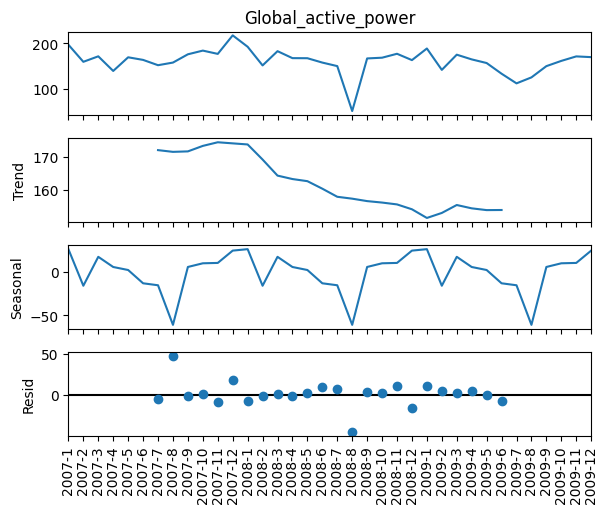

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(train_data['Global_active_power'],period=12)
decomp.plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
t1=train_data['Global_active_power']

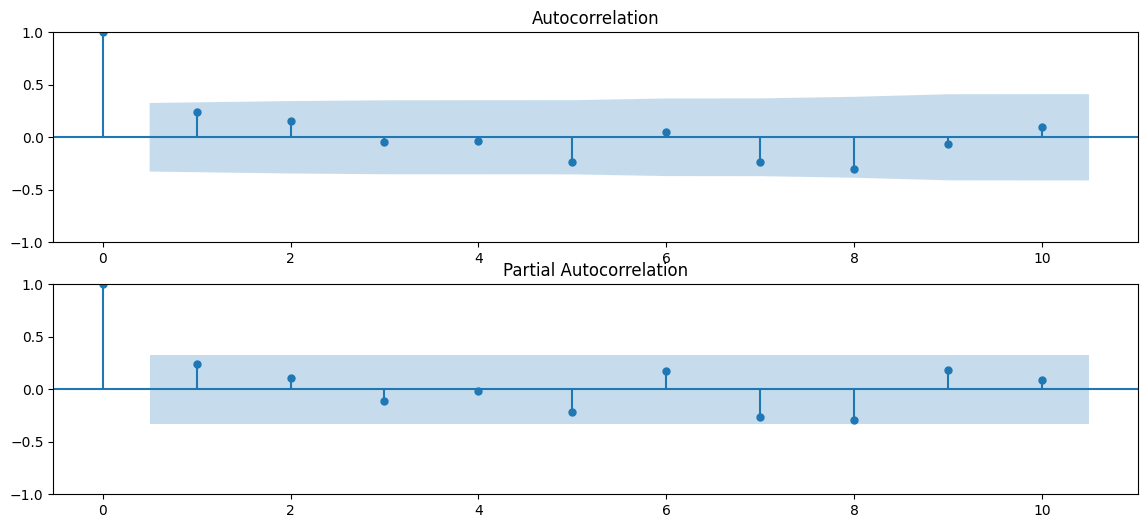

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(t1, lags=10, ax=ax1)
ax2 = plot_pacf(t1, lags=10, ax=ax2)
plt.show()

In [ ]:
#get d value of the arima test
result = adfuller(t1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.614473
p-value: 0.000121
Critical Test Statistics Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [ ]:
#p<0.05 Data is  stationary, we do not need differencing d
#q value from ACF = < 1
#p value from PAF = < 1

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm
model = pm.auto_arima(train_data['Global_active_power'], d=0,
                      D=1,seasonal=True, m=12, trend='c',start_p=0, start_q=0,
                       test='adf', stepwise=True, trace=True,add=False)
print(model.summary())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=227.588, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=235.737, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=227.469, Time=0.92 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=235.737, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=237.339, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=8.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=229.431, Time=3.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=2.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.74 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=225.590, Time=2.33 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.94 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=229.591, Time=1.95 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=227.476, Time=1.26 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=229.468, Time=1.64 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,0)[12]             : AIC=225.590, Time=0.64 sec

Best model:  ARIMA(0,0,0)(1,1,0)[12]          
Total fit time: 35.485 seconds
                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   36
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -109.795
Date:                  Thu, 19 Dec 2024   AIC                            225.590
Time:                          20:09:50   BIC                            229.124
Sample:                      01-01-2007   HQIC                           226.527
                           - 12-01-2009                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -16.0207      6.064     -2.642      

In [ ]:
p, d, q = model.order
P, D, Q, m = model.seasonal_order
p,d,q,P,D,Q,m

(0, 0, 0, 1, 1, 0, 12)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data['Global_active_power'],order=(p,d,q),seasonal_order=(P,D,Q,m))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Results of SARIMAX on train
                                SARIMAX Results                                 
Dep. Variable:      Global_active_power   No. Observations:                   36
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -113.511
Date:                  Thu, 19 Dec 2024   AIC                            231.021
Time:                          20:09:50   BIC                            233.377
Sample:                      01-01-2007   HQIC                           231.646
                           - 12-01-2009                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6543      0.208     -3.142      0.002      -1.062      -0.246
sigma2       568.9318    270.018      2.107      0.035      39.706    1098.158
Ljung-Bo

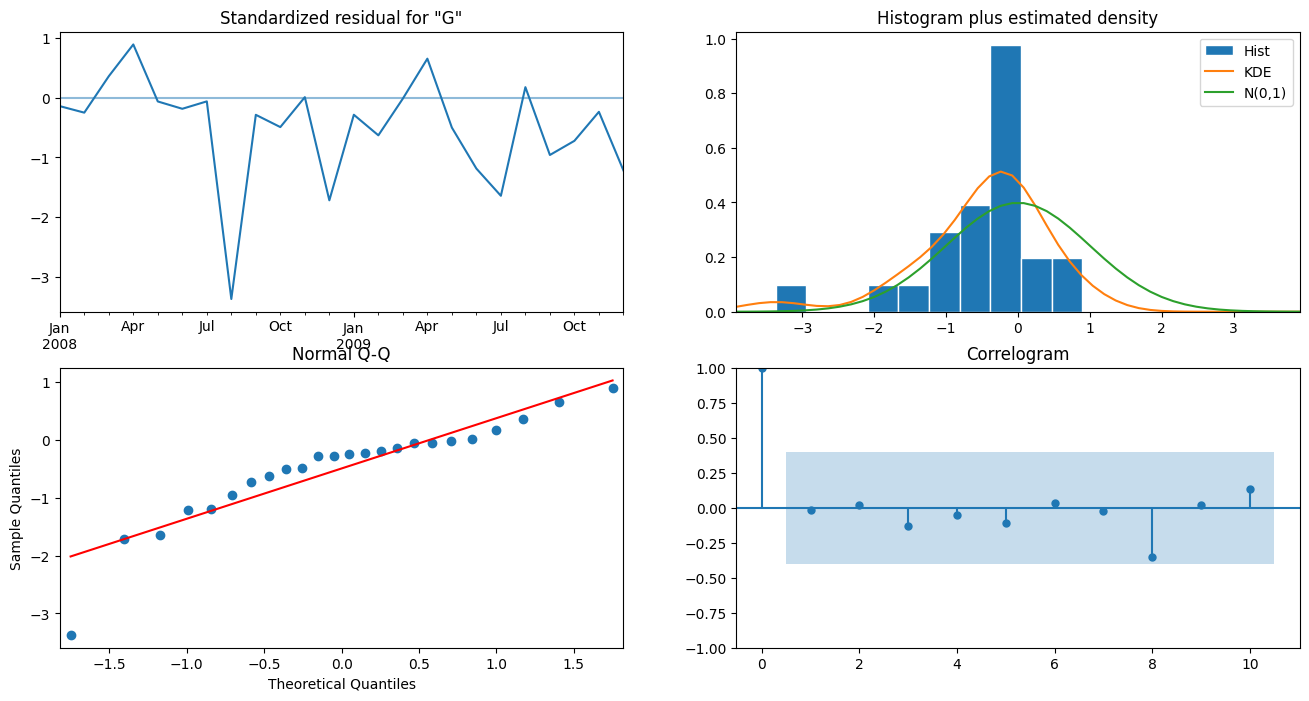

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

In [ ]:
#The first plot on the left shows the residuals over time
#QQ plot shows no systamtic depurture from normality
#the top-right plot shows that kde line
#correlogram on the bottom right suggests that there is no autocorrelation in the residuals,

In [ ]:
forecast = results.get_forecast(steps=11)
mean = forecast.predicted_mean

In [ ]:
forecast_index = pd.date_range(start=train_data.index[-1], periods=12, freq='ME')[1:]
forecast_index = [d.strftime('%Y-%m') for d in forecast_index]
print(forecast_index)


['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11']


In [ ]:
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecast': mean})

In [ ]:
forecast_df.set_index('Date', inplace=True)

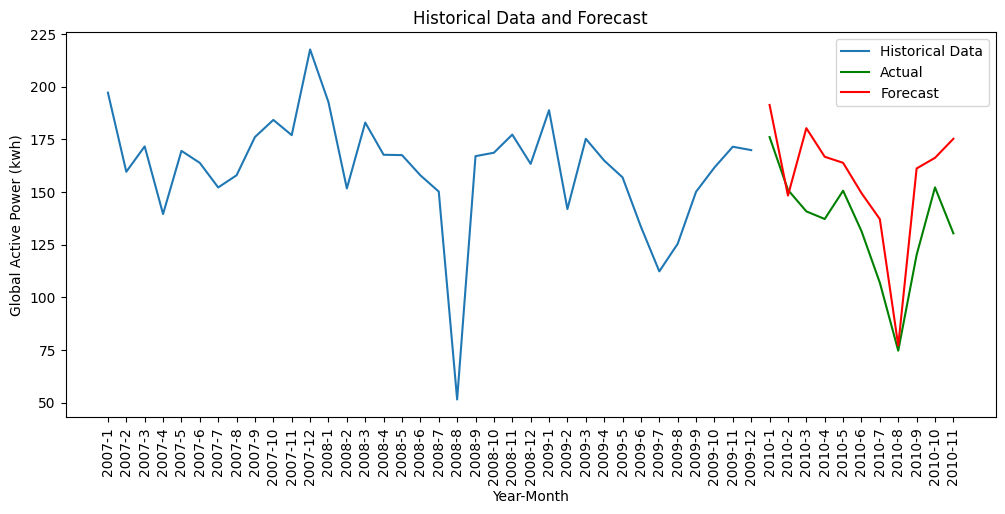

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(12,5))
plt.plot(train_data.index, train_data['Global_active_power'], label='Historical Data')
plt.plot(test_data.index, test_data['Global_active_power'], label='Actual', color='green')
plt.plot(test_data.index, forecast_df['Forecast'], label='Forecast', color='red')

plt.xlabel('Year-Month')
plt.ylabel('Global Active Power (kwh)')
plt.title('Historical Data and Forecast')
plt.legend()
plt.savefig('p')
plt.xticks(rotation=90)
plt.show()

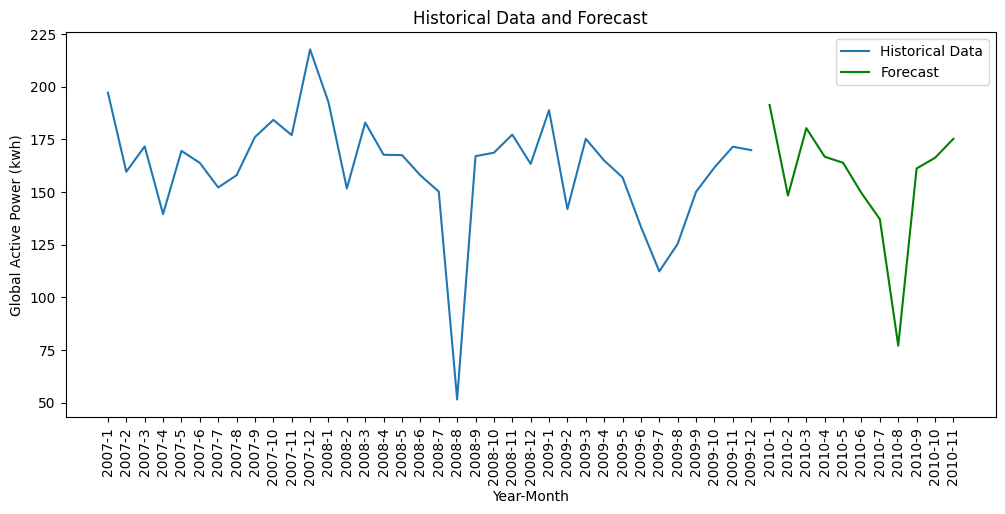

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(12,5))
plt.plot(train_data.index, train_data['Global_active_power'], label='Historical Data')
plt.plot(test_data.index, forecast_df['Forecast'], label='Forecast', color='green')

plt.xlabel('Year-Month')
plt.ylabel('Global Active Power (kwh)')
plt.title('Historical Data and Forecast')
plt.legend()
plt.savefig('p')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test_data['Global_active_power'], forecast_df['Forecast'])
print(f"MAPE: {mape}")

MAPE: 0.1744167568865816


In [ ]:
mse = np.mean(results.resid**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(results.resid))

print("\nModel Accuracy Metrics:")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Model Accuracy Metrics:
Root Mean Square Error: 102.85
Mean Absolute Error: 69.69


# Forecasting for 24 Months

In [ ]:
forecast = results.get_forecast(steps=24)
mean = forecast.predicted_mean

In [ ]:
forecast_index = pd.date_range(start=s.index[-1], periods=24+1, freq='ME')[1:]
forecast_index = [d.strftime('%Y-%m') for d in forecast_index]
print(forecast_index)


['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11']


In [ ]:
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecast': mean})

In [ ]:
forecast_df.set_index('Date', inplace=True)

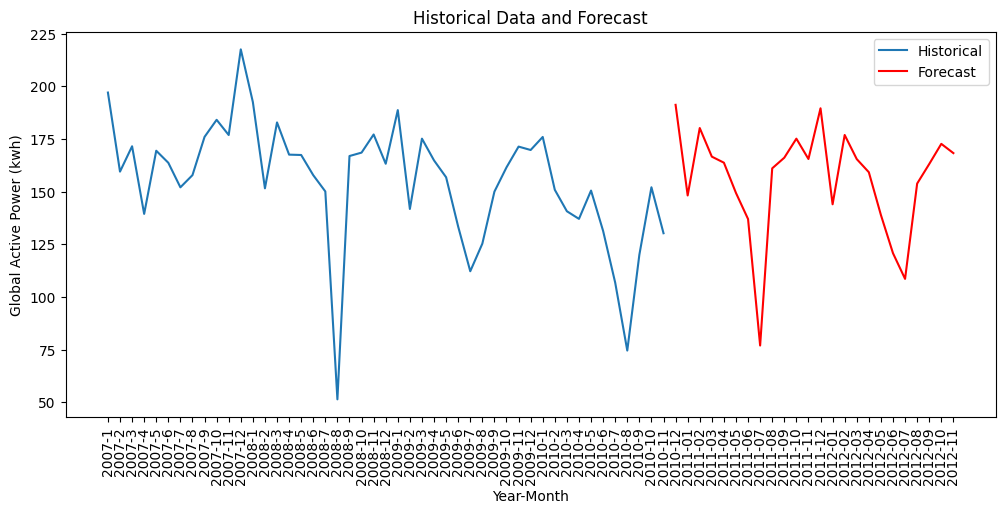

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(12,5))
plt.plot(s.index, s['Global_active_power'], label='Historical')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')

plt.xlabel('Year-Month')
plt.ylabel('Global Active Power (kwh)')
plt.title('Historical Data and Forecast')
plt.legend()
plt.savefig('p')
plt.xticks(rotation=90)
plt.show()

#Experimenting - Smoothening before Sarimax

In [ ]:
mp = Monthly_power.copy()

In [ ]:
scaled = dict()
series = mp['Global_active_power'].copy()
scaled = (series - series.mean()) / series.std()
scaled = pd.DataFrame(scaled)
print(scaled.head())

   Global_active_power
0             1.423471
1             0.153765
2             0.560921
3            -0.525504
4             0.489205


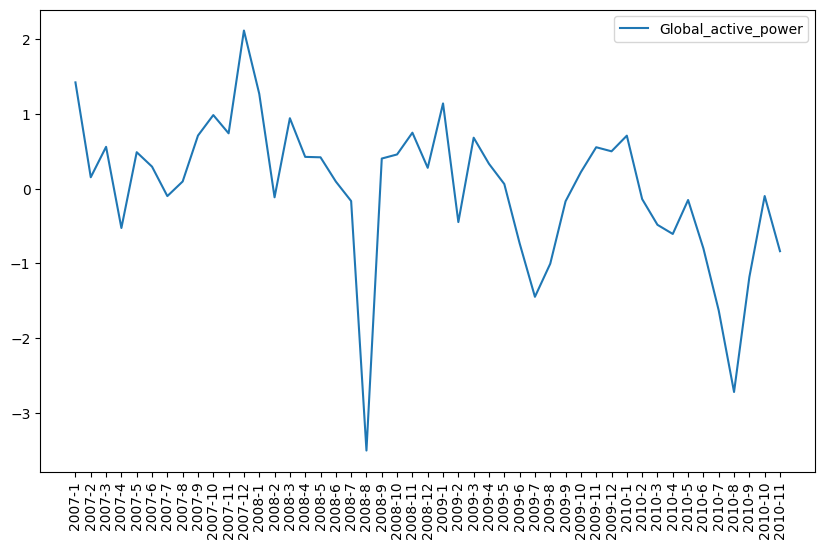

In [ ]:
import numpy as np

time=mp['Year-Month'].unique()
plt.figure(figsize=(10, 6))
plt.plot(time,scaled)
plt.xticks(time, rotation=90)
plt.legend(scaled.columns)

In [ ]:
from scipy.signal import detrend

detrended = dict()
detrended = detrend(scaled)
detrended = pd.DataFrame(detrended, index=time)
print(detrended.head())

                   0
2007-1  4.440892e-16
2007-2  5.551115e-17
2007-3  2.220446e-16
2007-4 -2.220446e-16
2007-5  1.110223e-16


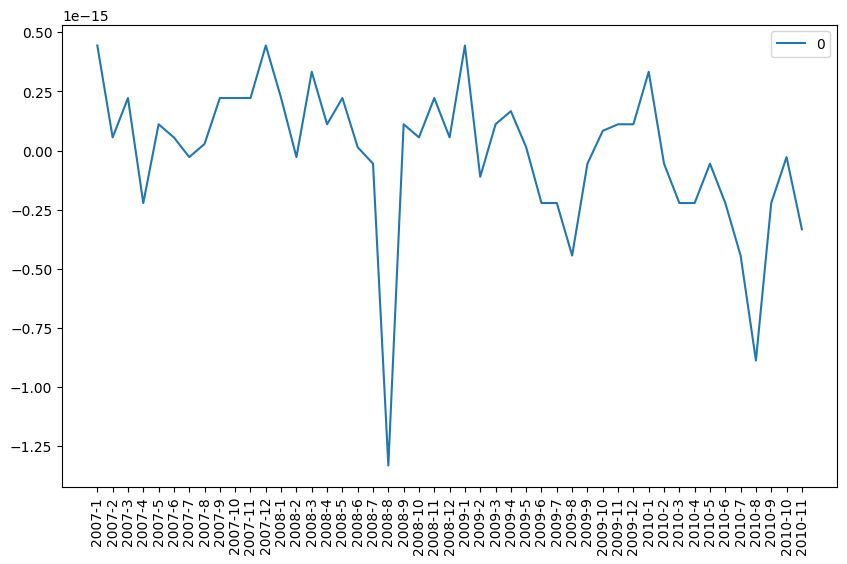

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time,detrended)
plt.xticks(time, rotation=90)
plt.legend(detrended.columns)

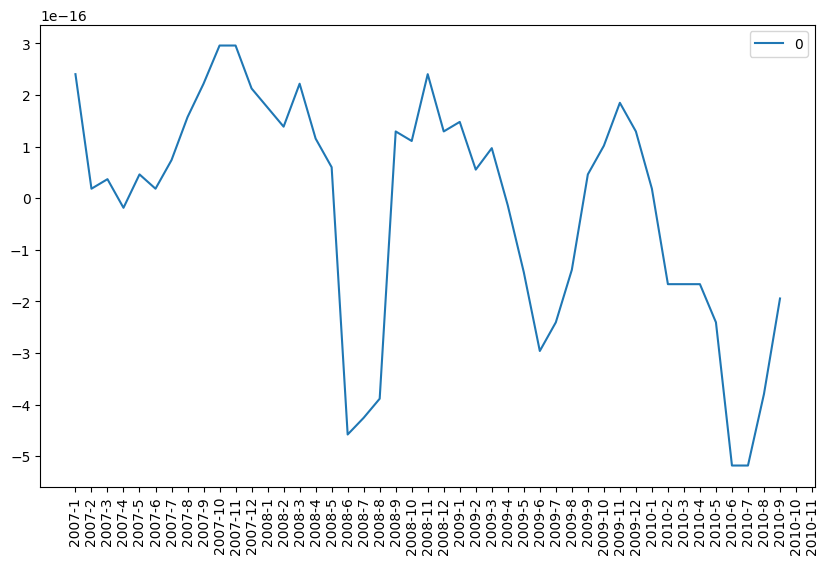

In [ ]:
smoothed = detrended.rolling(3).mean().dropna()
plt.figure(figsize=(10, 6))
plt.plot(time[0:45],smoothed )
plt.xticks(time, rotation=90)
plt.legend(smoothed.columns)

In [ ]:
smoothed.head()

,0
2007-3,2.405483e-16
2007-4,1.850372e-17
2007-5,3.700743e-17
2007-6,-1.850372e-17
2007-7,4.625929e-17


In [ ]:
smoothed.rename(columns={0: 'Global_active_power'}, inplace=True)
smoothed.reset_index(inplace=True)
smoothed.rename(columns={'index': 'Date'}, inplace=True)


In [ ]:
smoothed.head()

,Date,Global_active_power
0,2007-3,2.405483e-16
1,2007-4,1.850372e-17
2,2007-5,3.700743e-17
3,2007-6,-1.850372e-17
4,2007-7,4.625929e-17


## Data Prep

In [ ]:
s = smoothed.copy()

In [ ]:
s['MonthEnd'] = pd.to_datetime(s['Date'], format='%Y-%m') + pd.offsets.MonthEnd(0)

In [ ]:
s['Year'] = s['MonthEnd'].dt.year
s['Month'] = s['MonthEnd'].dt.month

In [ ]:
s = s[s['MonthEnd'].dt.year != 2006]

In [ ]:
s.set_index('Date', inplace=True)

In [ ]:
train_data = s[s['MonthEnd'].dt.year != 2010]
test_data = s[s['MonthEnd'].dt.year == 2010]

(train_data.head(), test_data.head())

(        Global_active_power   MonthEnd  Year  Month
 Date                                               
 2007-3         2.405483e-16 2007-03-31  2007      3
 2007-4         1.850372e-17 2007-04-30  2007      4
 2007-5         3.700743e-17 2007-05-31  2007      5
 2007-6        -1.850372e-17 2007-06-30  2007      6
 2007-7         4.625929e-17 2007-07-31  2007      7,
         Global_active_power   MonthEnd  Year  Month
 Date                                               
 2010-1         1.850372e-16 2010-01-31  2010      1
 2010-2         1.295260e-16 2010-02-28  2010      2
 2010-3         1.850372e-17 2010-03-31  2010      3
 2010-4        -1.665335e-16 2010-04-30  2010      4
 2010-5        -1.665335e-16 2010-05-31  2010      5)

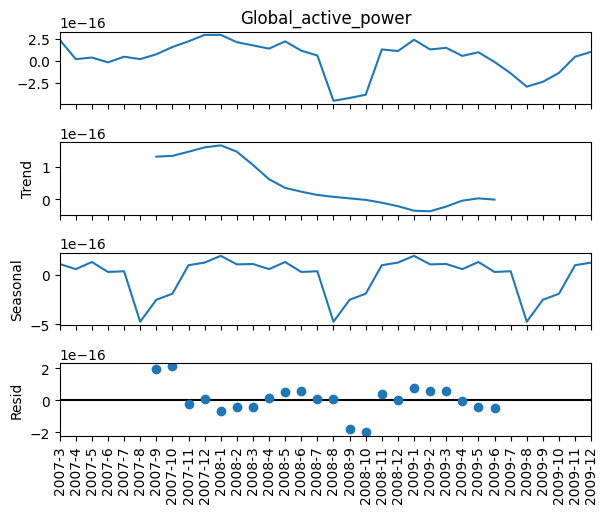

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(train_data['Global_active_power'],period=12)
decomp.plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
t1=train_data['Global_active_power']

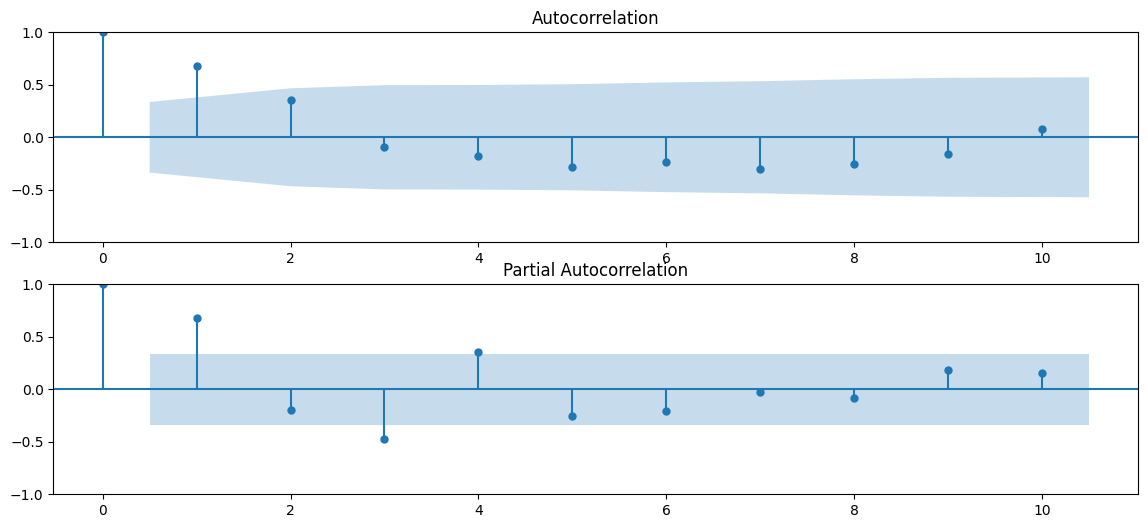

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(t1, lags=10, ax=ax1)
ax2 = plot_pacf(t1, lags=10, ax=ax2)
plt.show()

In [ ]:
#get d value of the arima test
result = adfuller(t1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.153721
p-value: 0.943818
Critical Test Statistics Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


In [ ]:
#Data is not stationary, we need differencing d
#q value from ACF = 1
#p value from PAF = 1

## Arima

In [ ]:
p, d, q = 1,1,1
model = ARIMA(train_data['Global_active_power'], order=(p, d, q))
model_fit = model.fit()
model_summary = model_fit.summary()
model_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Global_active_power   No. Observations:                   34
Model:                  ARIMA(1, 1, 1)   Log Likelihood                 406.672
Date:                 Thu, 19 Dec 2024   AIC                           -807.345
Time:                         20:10:12   BIC                           -802.855
Sample:                     03-01-2007   HQIC                          -805.834
                          - 12-01-2009                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       -1.07e-09   6.37e-19  -1.68e+09      0.000   -1.07e-09   -1.07e-09
ma.L1       -1.07e-09   6.37e-19  -1.68e+09      0.000   -1.07e-09   -1.07e-09
sigma2      1.457e-12   3.36e-10      0.004      0.997   -6.56e-10    6.59e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                34.86
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             0.02
Prob(H) (two-sided):                  0.42   Kurtosis:                         8.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

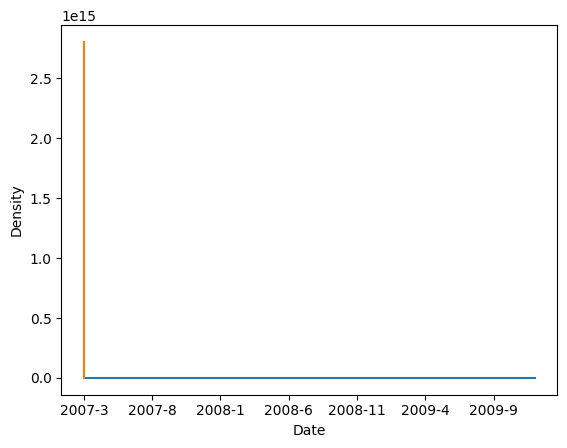

In [ ]:
# plot residual errors
residuals = model_fit.resid
residuals.plot()
residuals.plot(kind='kde')
plt.show()

In [ ]:
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

AIC: -807.3448850417301
BIC: -802.8553623573307


In [ ]:
forecast = model_fit.forecast(steps=11)


In [ ]:
forecast.head()

,predicted_mean
2010-01-01,1.017704e-16
2010-02-01,1.017704e-16
2010-03-01,1.017704e-16
2010-04-01,1.017704e-16
2010-05-01,1.017704e-16


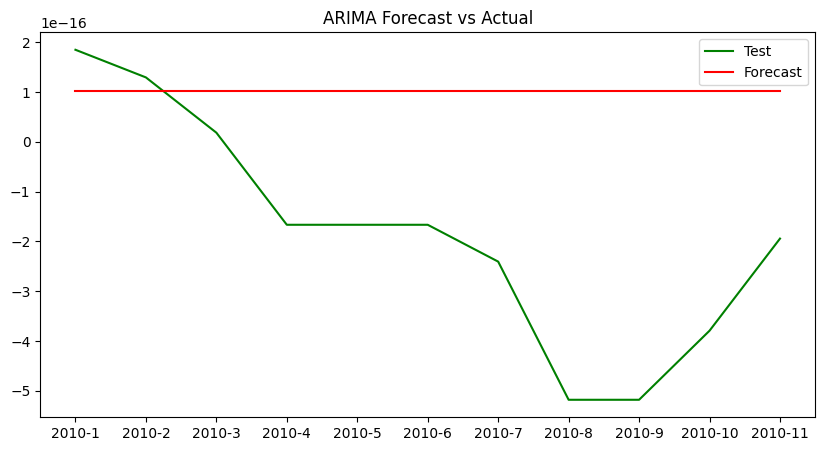

In [ ]:

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(test_data.index,test_data['Global_active_power'], label='Test', color='green')
plt.plot(test_data.index,forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_data['Global_active_power'], forecast)
print(f"RMSE: {rmse}")

RMSE: 1.3048856250771537e-31


## Sarima

In [ ]:
import pmdarima as pm
model = pm.auto_arima(train_data['Global_active_power'], d=1,
                      D=1,seasonal=True, m=12, trend='c',start_p=0, start_q=0,max_p=3, max_q=3,
                       test='adf', stepwise=True, trace=True,add=False)
print(model.summary())


Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-418.543, Time=5.88 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-422.543, Time=0.48 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-406.938, Time=10.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-418.543, Time=1.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-408.938, Time=0.70 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-420.543, Time=0.57 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-420.543, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-420.543, Time=0.35 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-418.543, Time=0.46 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=-422.543, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12] intercept
Total fit time: 20.149 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 213.271
Date:                            Thu, 19 Dec 2024   AIC                           -422.543
Time:                                    20:10:35   BIC                           -420.454
Sample:                                03-01-2007   HQIC                          -422.089
                                     - 12-01-2009                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

In [ ]:
p, d, q = model.order
P, D, Q, m = model.seasonal_order
p,d,q,P,D,Q,m

(0, 1, 0, 0, 1, 0, 12)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data['Global_active_power'],order=(p,d,q),seasonal_order=(P,D,Q,m))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

Results of SARIMAX on train
                                     SARIMAX Results                                      
Dep. Variable:                Global_active_power   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 215.797
Date:                            Thu, 19 Dec 2024   AIC                           -429.594
Time:                                    20:10:35   BIC                           -428.549
Sample:                                03-01-2007   HQIC                          -429.367
                                     - 12-01-2009                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.159e-10   4.57e-10      0.691      0.490    -5.8e-10    1.21e-09
Ljung-B

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


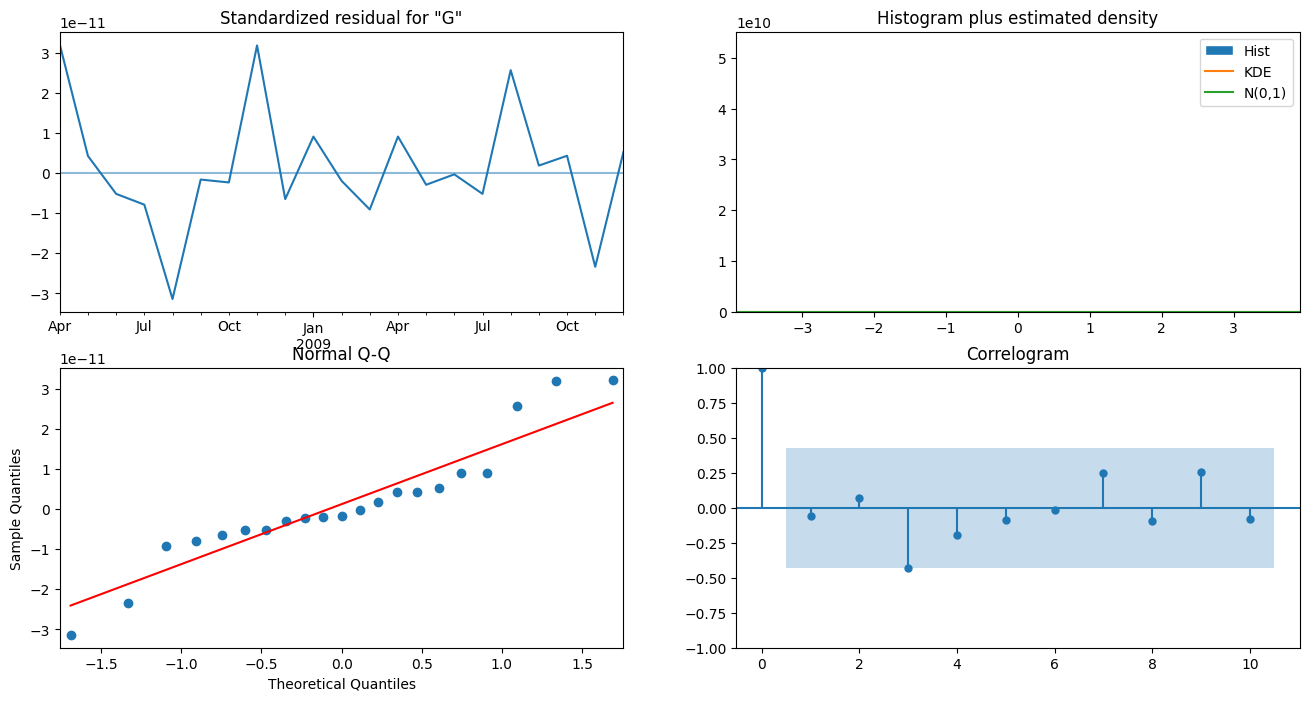

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

In [ ]:
forecast = results.get_forecast(steps=11)
mean = forecast.predicted_mean

In [ ]:
forecast_index = pd.date_range(start=train_data.index[-1], periods=12, freq='ME')[1:]
forecast_index = [d.strftime('%Y-%m') for d in forecast_index]
print(forecast_index)


['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11']


In [ ]:
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecast': mean})

In [ ]:
forecast_df.set_index('Date', inplace=True)

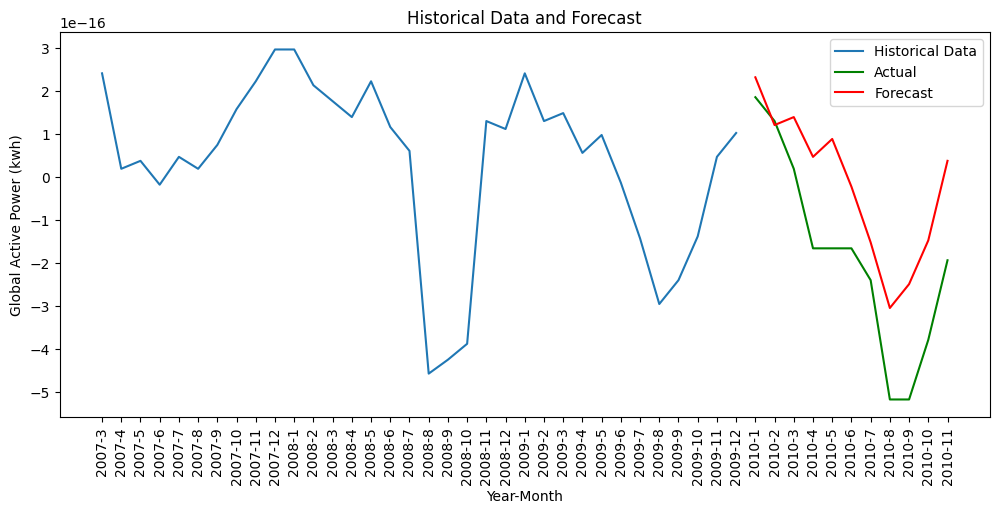

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(12,5))
plt.plot(train_data.index, train_data['Global_active_power'], label='Historical Data')
plt.plot(test_data.index, test_data['Global_active_power'], label='Actual', color='green')
plt.plot(test_data.index, forecast_df['Forecast'], label='Forecast', color='red')

plt.xlabel('Year-Month')
plt.ylabel('Global Active Power (kwh)')
plt.title('Historical Data and Forecast')
plt.legend()
plt.savefig('p')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test_data['Global_active_power'], forecast_df['Forecast'])
print(f"MAPE: {mape}")

MAPE: 0.5897314068045773


In [ ]:
mse = np.mean(results.resid**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(results.resid))

print("\nModel Accuracy Metrics:")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Model Accuracy Metrics:
Root Mean Square Error: 0.00
Mean Absolute Error: 0.00


In [ ]:
#MAPE is bad. May be smoothening was not required.